In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import datetime as dt


%matplotlib inline 


df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['US', 'United Kingdom', 'China', 'India', 'Italy', 'Brazil']
df = df[df['Country'].isin(countries)]

df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [9]:
df.head()
df.to_csv(r'\export_dataframe.csv', index = False, header=True)

In [ ]:

b = str("Brazil adopts social distancing")
b2 = str("Brazil stops reporting cases")
b3 = str("Brazil identifies Variant B117")


c = str("China adopts social distancing")
c2 = str("China adopts social distancing")

h = str("India adopts social distancing")
h2 = str("India adopts social distancing")

i = str("Italy adopts social distancing")
i2 = str("Italy adopts social distancing")

k = str("UK adopts social distancing")
k2 = str("UK adopts social distancing")

z = str("USA adopts social distancing")
z2 = str("USA adopts social distancing")

In [213]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries


#census.gov
populations = {'Brazil':214051726, 'China': 144781625,'India': 1393469634, 'Italy': 60375343, 'United Kingdom': 68237053, 'US':332452320}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

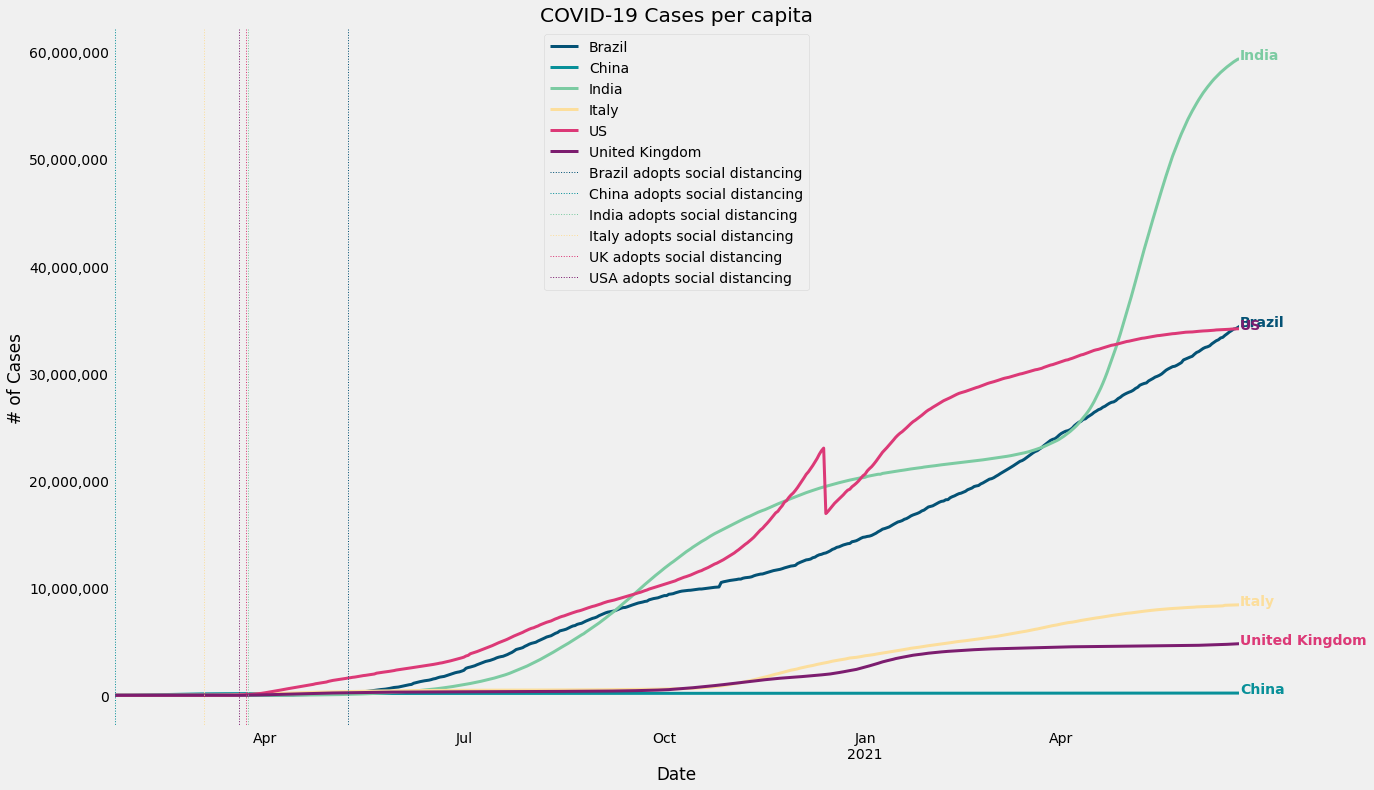

In [214]:

colors = {'Brazil':'#045275', 'China':'#089099', 'India':'#7CCBA2', 'Italy':'#FCDE9C', 'United Kingdom':'#DC3977', 'US':'#7C1D6F'}
plt.style.use('fivethirtyeight')
plot = covid.plot(figsize=(18,12), color=list(colors.values()), linewidth=3, legend=True)
plt.title("COVID-19 Cases per capita")
plot.axvline(dt.datetime(2020, 5, 9),color='#045275',linewidth=1,label=b).set_linestyle('dotted') 
plot.axvline(dt.datetime(2020, 1, 23),color='#089099',linewidth=1,label=c).set_linestyle('dotted') 
plot.axvline(dt.datetime(2020, 3, 24),color='#7CCBA2',linewidth=1,label=h).set_linestyle('dotted')
plot.axvline(dt.datetime(2020, 3, 4),color='#FCDE9C',linewidth=1,label=i).set_linestyle('dotted')
plot.axvline(dt.datetime(2020, 3, 23),color='#DC3977',linewidth=1,label=k).set_linestyle('dotted')
plot.axvline(dt.datetime(2020, 3, 20),color='#7C1D6F',linewidth=1,label=z).set_linestyle('dotted')

plt.legend(loc= 'upper center')
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

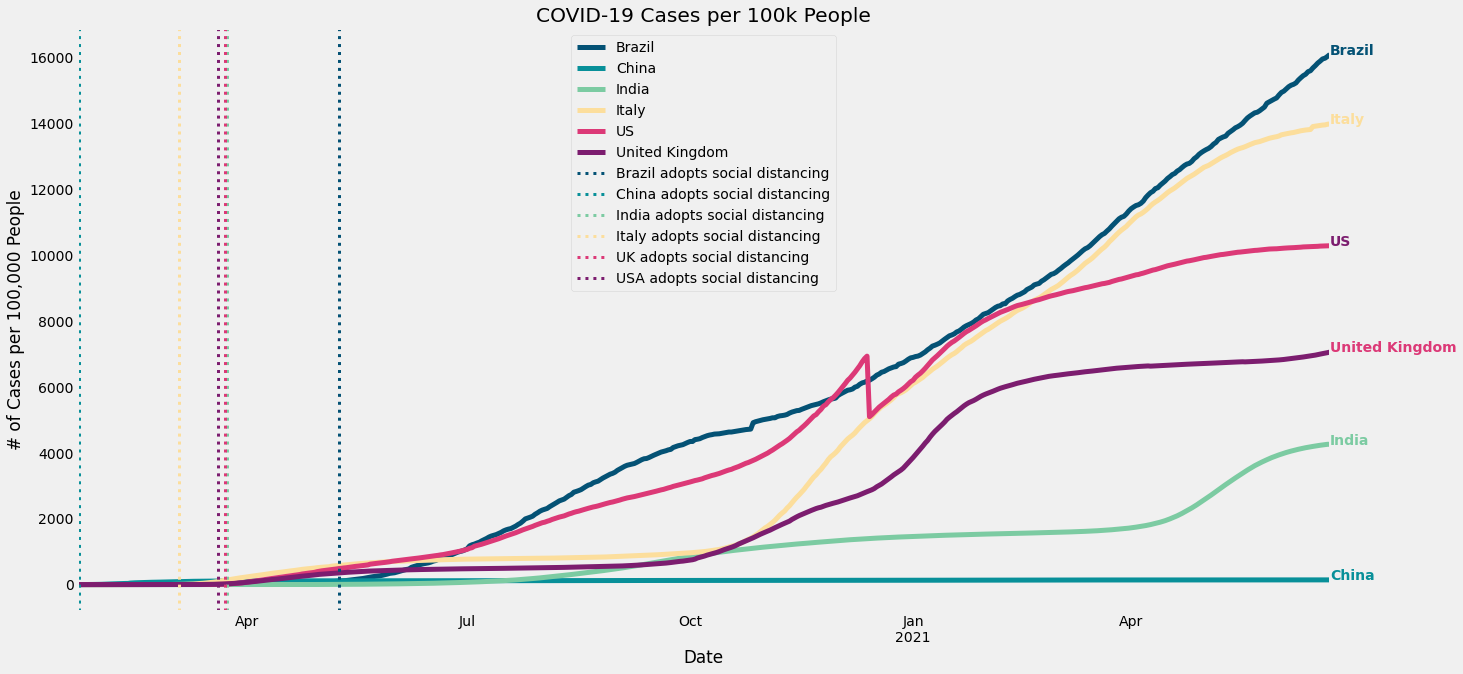

In [215]:
percapitaplot = percapita.plot(figsize=(20,10), color=list(colors.values()), linewidth=5, legend=True)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
plt.title("COVID-19 Cases per 100k People")
percapitaplot.axvline(dt.datetime(2020, 5, 9),color='#045275',linewidth=3,label=b).set_linestyle('dotted') 
percapitaplot.axvline(dt.datetime(2020, 1, 23),color='#089099',linewidth=3,label=c).set_linestyle('dotted') 
percapitaplot.axvline(dt.datetime(2020, 3, 24),color='#7CCBA2',linewidth=3,label=h).set_linestyle('dotted')
percapitaplot.axvline(dt.datetime(2020, 3, 4),color='#FCDE9C',linewidth=3,label=i).set_linestyle('dotted')
percapitaplot.axvline(dt.datetime(2020, 3, 23),color='#DC3977',linewidth=3,label=k).set_linestyle('dotted')
percapitaplot.axvline(dt.datetime(2020, 3, 20),color='#7C1D6F',linewidth=3,label=z).set_linestyle('dotted')
plt.legend(loc= 'upper center')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')


In [216]:
df.head()

Country,Brazil,China,India,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0


In [ ]:
import ruptures as rpt
import numpy as np
#read CSV file
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['US', 'United Kingdom', 'China', 'India', 'Italy', 'Brazil']
df = df[df['Country'].isin(countries)]
points2=np.array(df.Date)

#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points2)
my_bkps = algo.predict(n_bkps=3)
# show results
rpt.show.display(points2, my_bkps, figsize=(17, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()

In [232]:
from setuptools import setup

import bayesian_changepoint_detection

sdt.changepoint.Pelt(cost='l2', min_size=2, jump=5, cost_params={}, engine='numba')

find_changepoints(df, prob_threshold=None, full_output=False, truncate=- 20)

NameError: name 'sdt' is not defined

In [221]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['US', 'United Kingdom', 'China', 'India', 'Italy', 'Brazil']
df = df[df['Country'].isin(countries)]

df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [223]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
11914,2020-01-22,Brazil,0,0,0,0
11915,2020-01-23,Brazil,0,0,0,0
11916,2020-01-24,Brazil,0,0,0,0
11917,2020-01-25,Brazil,0,0,0,0
11918,2020-01-26,Brazil,0,0,0,0


In [230]:
pip install bayesian_changepoint_detection

  Created wheel for bayesian-changepoint-detection: filename=bayesian_changepoint_detection-0.2.dev1-py3-none-any.whl size=6157 sha256=0a322a7356c07d3e89d04e8b996937a6b62d09085fdfb9fa6fc3b0b60638e20a
  Stored in directory: /Users/utkarsh/Library/Caches/pip/wheels/17/b1/05/5c93cdb87d944c0c2770edb04e5f5279101fe7b4ccdb42175f
Successfully built bayesian-changepoint-detection
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install cesium

     |████████████████████████████████| 260 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 554 kB 11.7 MB/s eta 0:00:01
  Created wheel for cesium: filename=cesium-0.9.12-cp38-cp38-macosx_11_0_x86_64.whl size=206923 sha256=62013b0b43e9c62fde176567b8f67822e997c9e9a48495f4b8914d4381cdaa1b
  Stored in directory: /Users/utkarsh/Library/Caches/pip/wheels/2f/ce/d1/1c5ff2870327ed321ccfa27508aaa4db0691ac1a84e70572d2
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43805 sha256=51bddb086951a460ad90b23bfbd15bcbc60d42fde7350ffede830c186bc893e5
  Stored in directory: /Users/utkarsh/Library/Caches/pip/wheels/13/7e/da/8944bc12def4de5f19b70d9c35634f78cbe6640907ff2e71ba
Successfully built cesium gatspy
Note: you may need to restart the kernel to use updated packages.
